<a href="https://colab.research.google.com/github/im-nandha/Loan-Approval-Prediction-using-Classification-models/blob/main/Loan_prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.metrics import classification_report, confusion_matrix

import warnings
warnings.filterwarnings("ignore")

In [ ]:
train = "train_u6lujuX_CVtuZ9i.csv"
train = pd.read_csv(train)
test = "test_Y3wMUE5_7gLdaTN.csv"
test = pd.read_csv(test)


In [ ]:
#Size of Train Data
train.shape

(614, 13)

In [ ]:
#Size of Test Data
test.shape

(367, 12)

In [ ]:

#Information about train Dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
# First look at the Dataset
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# **Data Preprocessing**

In [ ]:
# Concatenating the train and test data for data preprocessing:
data = pd.concat([train,test])

In [ ]:
# Dropping the unwanted column:
data.drop('Loan_ID', inplace=True, axis='columns')

In [ ]:
# Identify missing values:
data.isnull().sum()

,0
Gender,24
Married,3
Dependents,25
Education,0
Self_Employed,55
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,27
Loan_Amount_Term,20
Credit_History,79


In [ ]:
# Imputing the missing values:
data['Gender'].fillna(data['Gender'].mode()[0], inplace = True)
data['Married'].fillna(data['Married'].mode()[0], inplace = True)
data['Dependents'].fillna(data['Dependents'].mode()[0], inplace = True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0], inplace = True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace = True)

In [ ]:
data['Property_Area'] = data['Property_Area'].map({'Urban':0,'Rural':1, 'Semiurban':2}).astype(int)
data['Dependents'] = data['Dependents'].map({'0':0, '1':1, '2':2, '3+':3})

In [ ]:
#creating a new feature
data['Total_Income'] = data['ApplicantIncome'] + data['CoapplicantIncome']
data.drop(['ApplicantIncome', 'CoapplicantIncome'], axis='columns', inplace=True)

# Time to Perform **EXPLORATORY DATA ANALYSIS**

In [ ]:
# Splitting the data to new_train and new_test so that we can perform EDA.
new_train = data.iloc[:614]
new_test = data.iloc[614:]

In [ ]:
# Mapping ‘N’ to 0 and ‘Y’ to 1
new_train['Loan_Status'] = new_train['Loan_Status'].map({'N':0,'Y':1}).astype(int)

<Axes: xlabel='Dependents', ylabel='count'>

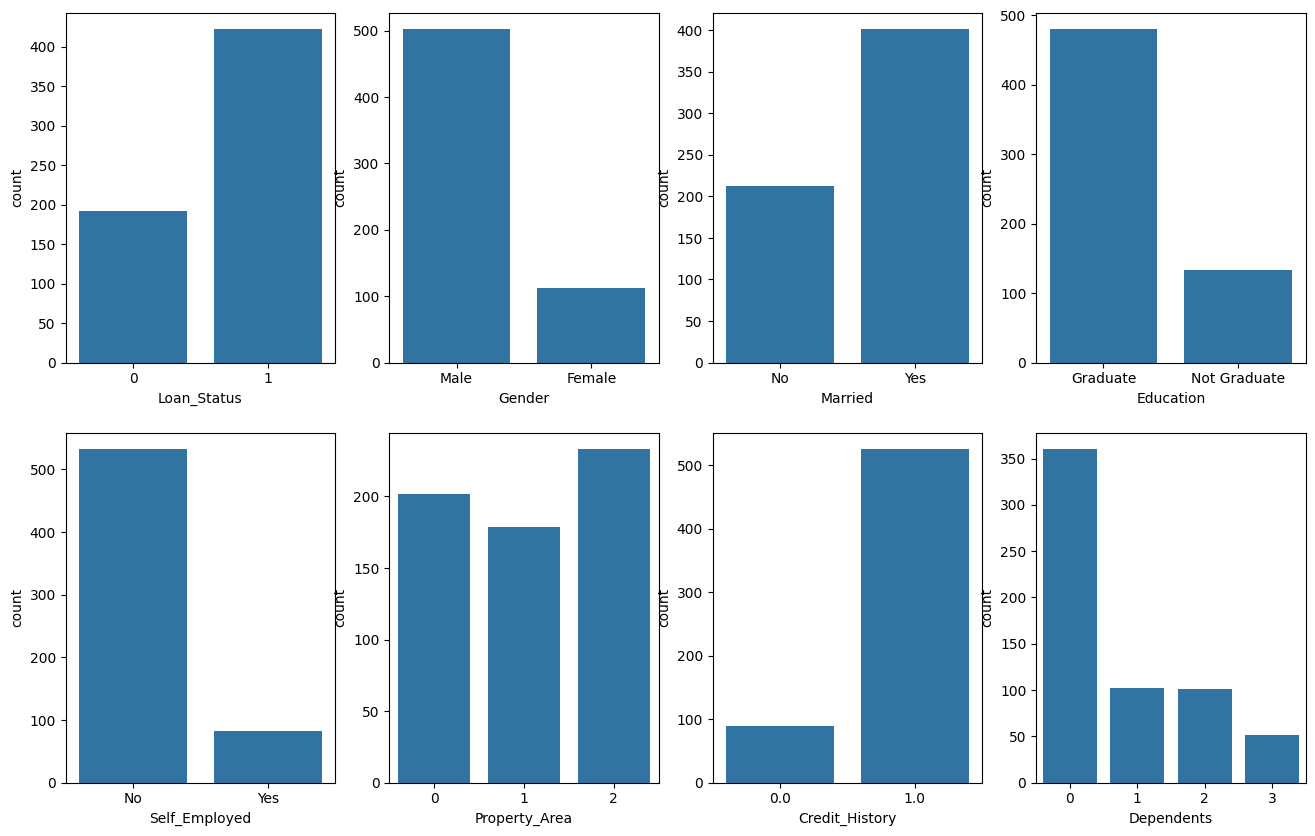

In [ ]:
# Univariate Analysis:
fig,ax = plt.subplots(2,4,figsize=(16,10))
sns.countplot(x='Loan_Status', data = new_train, ax=ax[0][0])
sns.countplot(x='Gender', data = new_train, ax=ax[0][1])
sns.countplot(x='Married', data = new_train, ax=ax[0][2])
sns.countplot(x='Education', data = new_train, ax=ax[0][3])
sns.countplot(x='Self_Employed', data = new_train, ax=ax[1][0])
sns.countplot(x='Property_Area', data = new_train, ax=ax[1][1])
sns.countplot(x='Credit_History', data = new_train, ax=ax[1][2])
sns.countplot(x='Dependents', data = new_train, ax=ax[1][3])

**Univariate Analysis Observations:**

1. The number of approved loans surpasses the number of rejected ones.
2. Male applicants outnumber female applicants.
3. Married individuals apply for loans more frequently than unmarried ones.
4. Graduates constitute a larger proportion of applicants compared to non-graduates.
5. The number of self-employed applicants is smaller than that of those who are not self-employed.
6. A majority of the properties are situated in semiurban areas.
7. Most applicants have a recorded credit history.
8. Applicants with zero dependents represent the largest group.



<Axes: xlabel='Loan_Status', ylabel='Total_Income'>

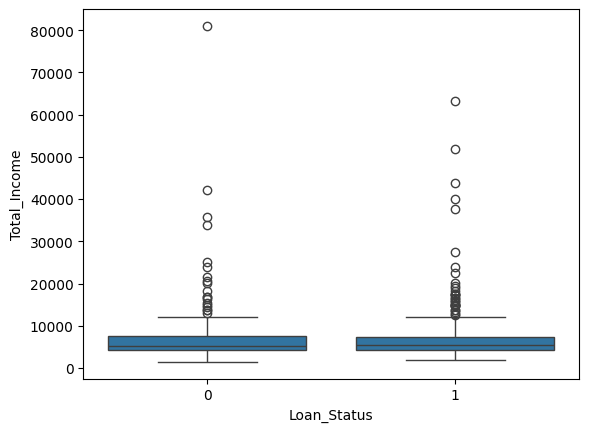

In [ ]:
# Bivariate Analysis
sns.boxplot(x='Loan_Status', y='Total_Income', data=new_train)

<Axes: xlabel='Gender', ylabel='LoanAmount'>

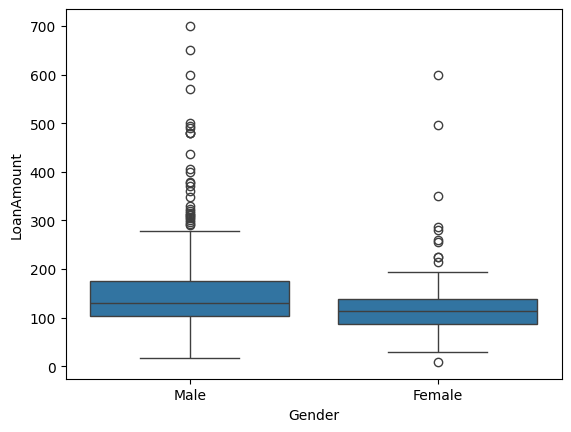

In [ ]:
sns.boxplot(x='Gender', y='LoanAmount', data=new_train)

<Axes: >

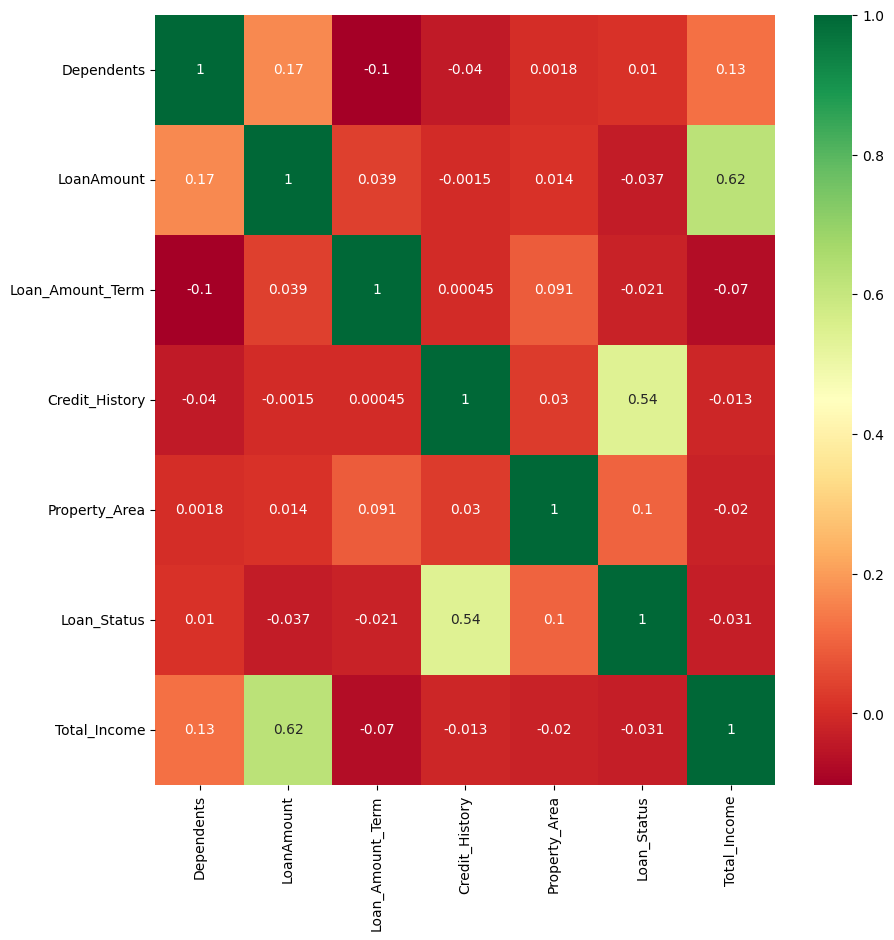

In [ ]:
# Correlation matrix
plt.figure(figsize = (10,10))
# Selecting only numerical features for correlation
numerical_features = new_train.select_dtypes(include=np.number)
correlation_matrix = numerical_features.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn')

# **Decision Tree**

In [ ]:
# Creating X (input variables) and Y (Target Variable) from the new_train data.
x = new_train.drop('Loan_Status', axis='columns')
y = new_train['Loan_Status']

In [ ]:
# Using train test split on the training data for validation
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=3)

In [ ]:
# Creating X (input variables) and Y (Target Variable) from the new_train data.
x = new_train.drop('Loan_Status', axis='columns')
y = new_train['Loan_Status']

# Convert categorical features to numerical using one-hot encoding
x = pd.get_dummies(x)

# Using train test split on the training data for validation
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=3)

#Building the model using DecisonTree
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
# Now we will be making the predictions on the testing data directly as it is of more importance.
from sklearn import metrics

# Getting the accuracy score for Decision Tree
dtree_pred = dtree.predict(X_test)
print("Accuracy Score =", format(metrics.accuracy_score(y_test,dtree_pred)))

Accuracy Score = 0.7027027027027027


In [ ]:
# Classification report and confusion matrix of the decision tree model
print(confusion_matrix(y_test, dtree_pred))
print(classification_report(y_test,dtree_pred))

[[ 26  19]
 [ 36 104]]
              precision    recall  f1-score   support

           0       0.42      0.58      0.49        45
           1       0.85      0.74      0.79       140

    accuracy                           0.70       185
   macro avg       0.63      0.66      0.64       185
weighted avg       0.74      0.70      0.72       185



# **Logistic Regression**

In [ ]:
# Creating X (input variables) and Y (Target Variable) from the new_train data.
x = new_train.drop('Loan_Status', axis='columns')
y = new_train['Loan_Status']

# Convert categorical features to numerical using one-hot encoding
x = pd.get_dummies(x)

# Using train test split on the training data for validation
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=3)

# Impute missing values using SimpleImputer (or IterativeImputer for more complex cases)
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent') # Replace NaN with the most frequent value

X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

#Building the model using LogisticRegression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [ ]:
logreg.predict(X_test)

# Getting the accuracy score for Logistic Regression
logreg_pred = logreg.predict(X_test)
print("Accuracy_Score =", format(metrics.accuracy_score(y_test, logreg_pred)))

Accuracy_Score = 0.8432432432432433


In [ ]:
# Classification report and confusion matrix of the SVM
print(confusion_matrix(y_test,logreg_pred ))
print(classification_report(y_test,logreg_pred))

[[ 21  24]
 [  5 135]]
              precision    recall  f1-score   support

           0       0.81      0.47      0.59        45
           1       0.85      0.96      0.90       140

    accuracy                           0.84       185
   macro avg       0.83      0.72      0.75       185
weighted avg       0.84      0.84      0.83       185



# **Random Forest**

In [ ]:
#Building the model using RandomForest
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

# Getting the accuracy score for Random Forest
rfc_pred = rfc.predict(X_test)
print("Accuracy_Score =", format(metrics.accuracy_score(y_test, rfc_pred)))

Accuracy_Score = 0.8162162162162162


In [ ]:
# Classification report and confusion matrix of the Random Forest model
print(confusion_matrix(y_test, rfc_pred))
print(classification_report(y_test,rfc_pred))

[[ 25  20]
 [ 14 126]]
              precision    recall  f1-score   support

           0       0.64      0.56      0.60        45
           1       0.86      0.90      0.88       140

    accuracy                           0.82       185
   macro avg       0.75      0.73      0.74       185
weighted avg       0.81      0.82      0.81       185



# **Visualizing the ROC curve**

In [ ]:
#Get predictions of Random Forest and Logistic Regression models in the form of probability values
y_lg_prob = logreg.predict_proba(X_test)[:,1]
y_rfc_prob = rfc.predict_proba(X_test)[:,1]

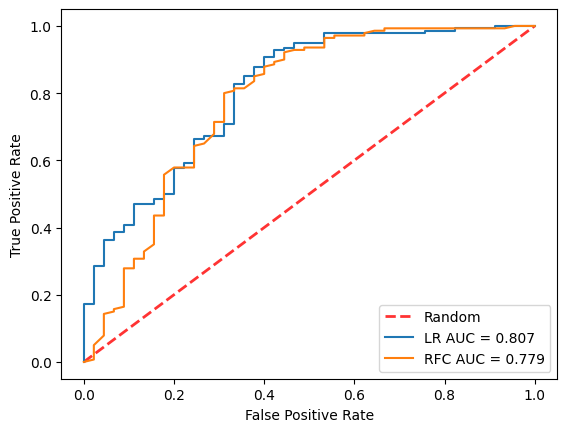

In [ ]:
#For Logistic Regression
fpr, tpr, _ = metrics.roc_curve(y_test,y_lg_prob)
auc = metrics.roc_auc_score(y_test, y_lg_prob)

#For Random Forest
fpr1, tpr1, _1 = metrics.roc_curve(y_test,y_rfc_prob)
auc1 = metrics.roc_auc_score(y_test, y_rfc_prob)

#create ROC curve
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',label='Random', alpha=.8)
plt.plot(fpr,tpr,label="LR AUC = "+str(round(auc,3)))
plt.plot(fpr1,tpr1,label="RFC AUC = "+str(round(auc1,3)))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

# **Conclusion**

Therefore, Random Forest and Logistic Regression are the best model for this prediction since their accuracy_score lies between 0.81 to 0.84. After using all these customer records, we are able to build a machine learning model to accurately predict whether or not the customers in the dataset would get loan approved or not along with that we were able to draw some insights from the data via data analysis and visualization.